Descriptive Statistics:
count    40.000000
mean     66.836750
std       4.737628
min      58.730000
25%      63.887500
50%      65.545000
75%      70.760000
max      76.650000
Name: bundle thickness, dtype: float64


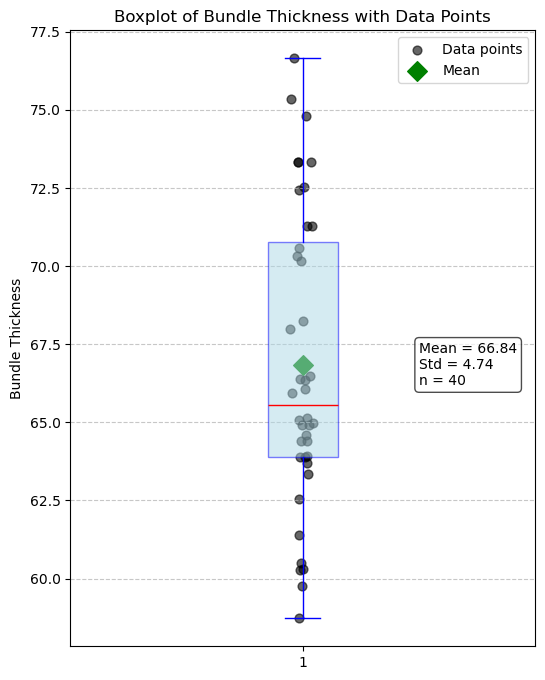

In [9]:
import pandas as pd
import matplotlib.pyplot as plt
import os 
import numpy as np
plt.rcParams['pdf.fonttype'] = 42
plt.rcParams['ps.fonttype'] = 42

# Path to the Excel file
root = "/Users/eminhanozil/Yanik Lab Dropbox/Eminhan Özil/Localization Manuscript 2024/in vitro/silk-coated-bundles/"
file_path = os.path.join(root, "silk_coated_bundle-thicknesses.xlsx")

# Read the Excel file
df = pd.read_excel(file_path)

# Extract the column of interest
col_name = "bundle thickness"
if col_name not in df.columns:
    raise ValueError(f"Column '{col_name}' not found in the Excel file. Available columns: {df.columns.tolist()}")

values = df[col_name].dropna()  # remove NaNs if any

# Descriptive statistics
print("Descriptive Statistics:")
print(values.describe())

mean_val = values.mean()
std_val = values.std()
n_val = len(values)

# Create boxplot
plt.figure(figsize=(6, 8))
plt.boxplot(values, vert=True, patch_artist=True,
            boxprops=dict(facecolor="lightblue", color="blue", alpha=0.5),
            medianprops=dict(color="red"),
            whiskerprops=dict(color="blue"),
            capprops=dict(color="blue"),
            flierprops=dict(markerfacecolor="orange", marker="o", markersize=8))

# Scatter plot of individual data points (jittered for visibility)
x_jitter = np.random.normal(1, 0.01, size=n_val)  # small horizontal spread
plt.scatter(x_jitter, values, color="black", alpha=0.6, s=40, label="Data points")

# Add mean marker
plt.scatter(1, mean_val, color="green", marker="D", s=100, label="Mean")

# Labels
plt.ylabel("Bundle Thickness")
plt.title("Boxplot of Bundle Thickness with Data Points")
plt.grid(axis='y', linestyle="--", alpha=0.7)

# Annotation text
textstr = f"Mean = {mean_val:.2f}\nStd = {std_val:.2f}\nn = {n_val}"
plt.text(1.25, mean_val, textstr,
         fontsize=10, va='center',
         bbox=dict(boxstyle="round,pad=0.3", facecolor="white", alpha=0.7))

plt.legend(loc="upper right")
plt.savefig(os.path.join(root, "bundle_thickness.pdf"), dpi=1000)
plt.show()